«**Прогнозирование размеров сварного шва при электронно-лучевой сварке тонкостенных конструкций аэрокосмического назначения»**
В качестве исходных данных были взяты результаты экспериментальных исследований, проводимых в целях улучшения технологического процесса электронно-лучевой сварки изделия, сборка которого состоит из элементов, состоящих из разнородного материала.
Установка электронно-лучевой сварки, на которой проводились исследования, предназначена для сварки электронным лучом в глубоком вакууме деталей сборочных единиц из нержавеющих сталей, титановых, алюминиевых и специальных сплавов.
Существующая установка электронно-лучевой сварки обеспечивает повторяемость режимов в рамках возможностей реализованной системы управления. Работы по сварке выполнялись на образцах-имитаторах, соответствующих технологическому изделию.
Для уменьшения вложения энергии при сварке:
Снижалась величина сварочного тока (IW):
Увеличивался ток фокусировки электронного пучка (IF):
Увеличивалась скорость сварки (VW);
Менялось расстояние от поверхности образцов до электронно-оптической
системы (FP).
Но совокупности параметров технологических режимов обеспечивались минимально возможные размеры сварных швов: глубина шва (Depth) и ширина
шва (Width).
В процессе выполнения работ была произведена электронно-лучевая сварка
18-ти единиц образнов.
Результаты металлографического контроля
по размерам сварного шва для каждого образна проводились в 4-х понеречных сечениях сварного шва. Ускоряющее напряжение было постоянным в дианазоне
19.8
20 кВ. Набор полученных данных собраны и составе режимюв сварки,
размеров сварочных швов в понеречных сечениях всех обращов. Станетеческие показатели набора обучающих данных указаны в табл. 1,

Задача:
Решить задачу регрессии (одним или несколькими методами) для предсказания глубины и ширины сварного соединения, выполнив необходимые этапы (разведочный анализ, предобработка)

# Импорт

In [14]:
# Работа с данными, визуализация
import pandas as pd         # Работа с  данными
import seaborn as sns        # Визуализация
import matplotlib.pyplot as plt  # Базовые  графики
import numpy as np

from sklearn.preprocessing import MinMaxScaler
# Сохранение и загрузка модели
import pickle               # Сохранение модели

# Разделение ,нормализация
from sklearn.model_selection import train_test_split  # Обучающую и тестовую выборки
from sklearn.preprocessing import StandardScaler      # Стандартизация данных

# Модели для регрессии
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor  # Модель K-ближайших соседей

# Оценка качества модели
from sklearn.metrics import mean_squared_error, r2_score

# Обработка данных

Загрузка и исследование данных.

# Загрузка данных
df = pd.read_csv('/content/sample_data/ebw_data.csv')


In [ ]:
# Загрузка данных
df = pd.read_csv('/content/sample_data/ebw_data.csv')

NameError: name 'pd' is not defined

## Ознакомление

Ознакомление со структурой данных.

In [ ]:
# Основная информация о данных
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IW      72 non-null     int64  
 1   IF      72 non-null     int64  
 2   VW      72 non-null     float64
 3   FP      72 non-null     int64  
 4   Depth   72 non-null     float64
 5   Width   72 non-null     float64
dtypes: float64(3), int64(3)
memory usage: 3.5 KB
None
              IW          IF         VW          FP      Depth      Width
count  72.000000   72.000000  72.000000   72.000000  72.000000  72.000000
mean   45.666667  141.333333   8.638889   78.333333   1.195556   1.970417
std     1.678363    5.145763   2.061078   21.493530   0.225081   0.279040
min    43.000000  131.000000   4.500000   50.000000   0.800000   1.680000
25%    44.000000  139.000000   8.000000   60.000000   1.080000   1.760000
50%    45.500000  141.000000   9.000000   80.000000   1.200000   1.840000
75%    47.000000  146.000000 

 Разведочный анализ

Плотность распределения для глубины и ширины шва

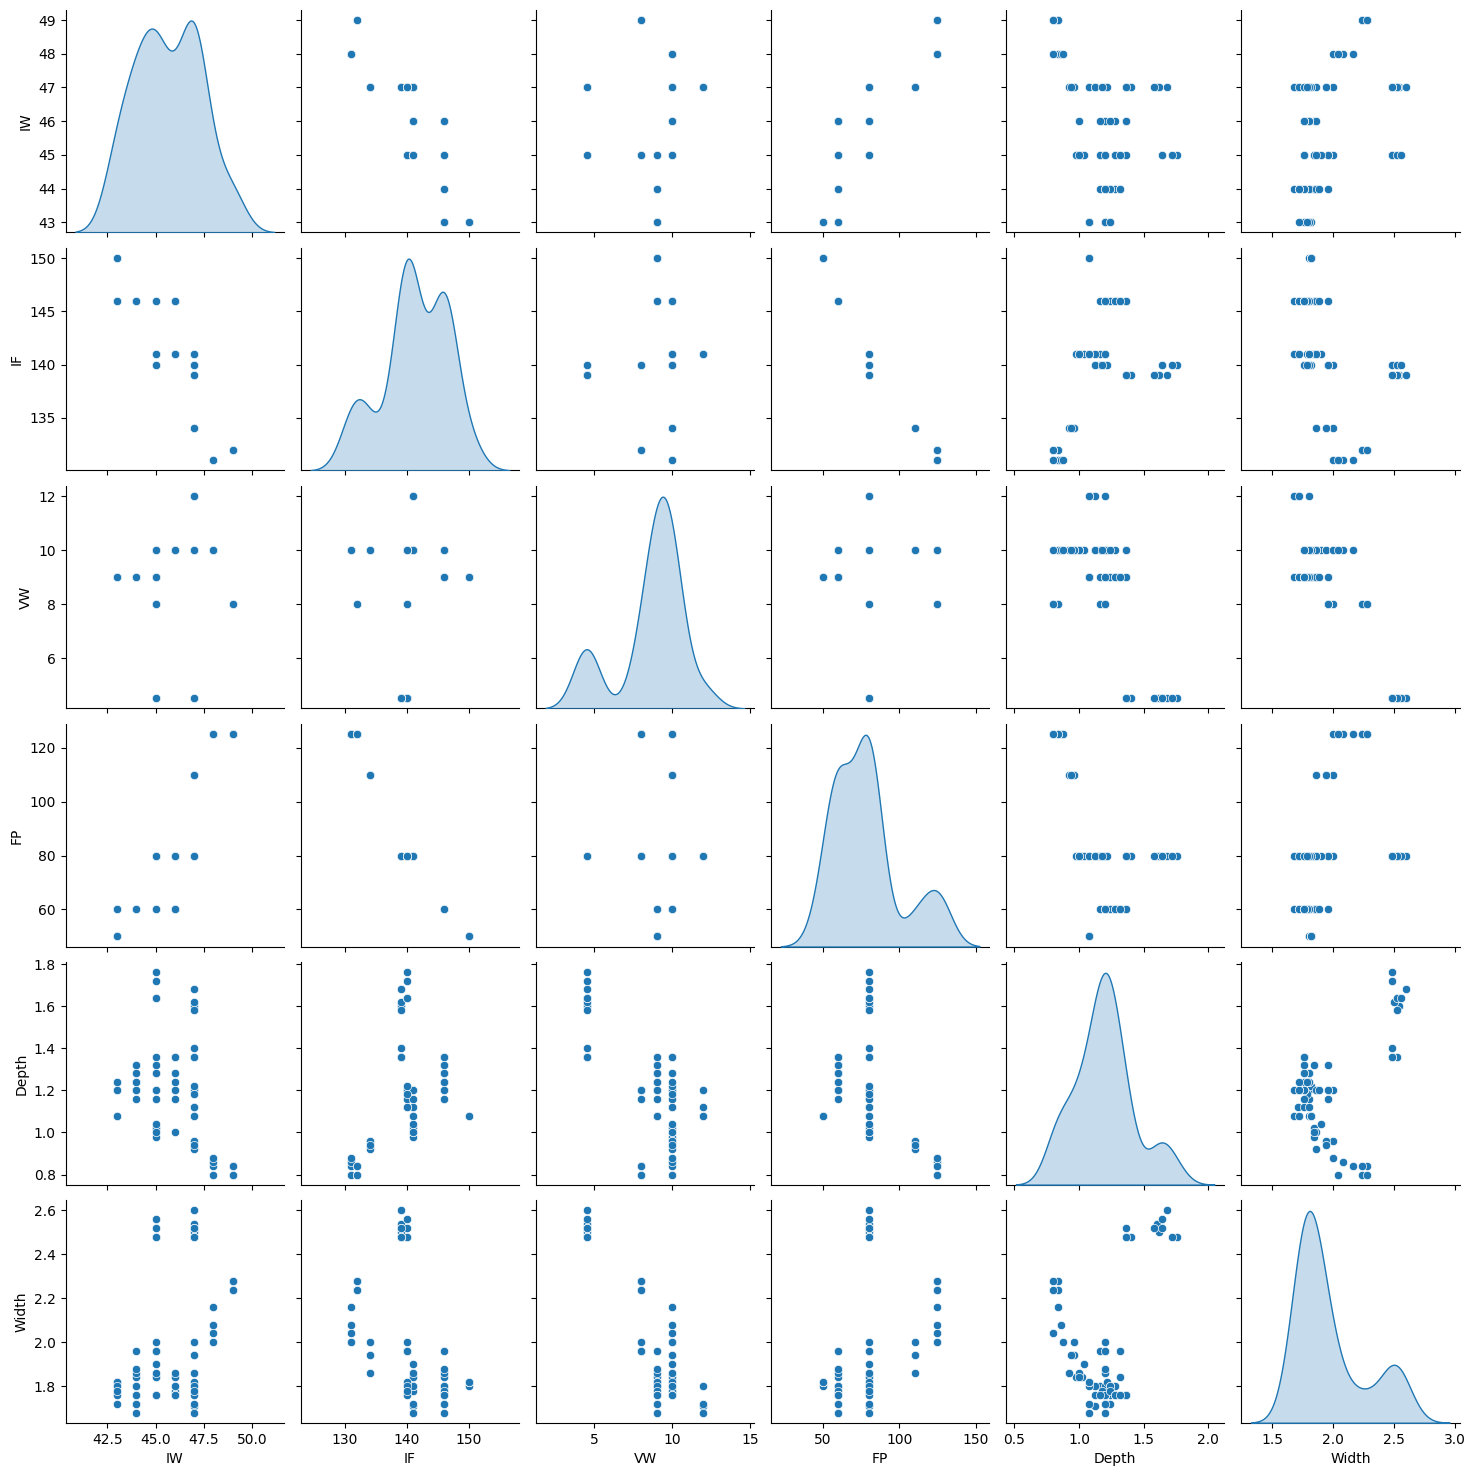

In [ ]:
# Визуализация данных с помощью pairplot
# графиков плотности
sns.pairplot(df, diag_kind="kde")
plt.show()

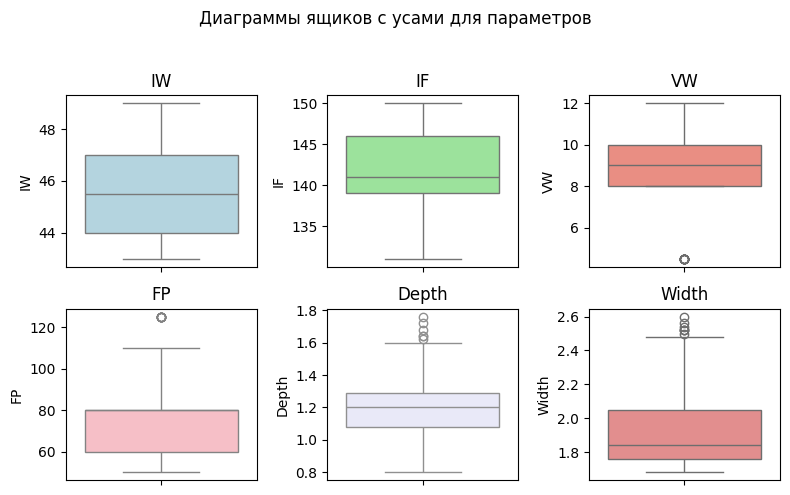

In [ ]:
# Диаграммы ящиков с усами для каждого параметра
fig, axes = plt.subplots(2, 3, figsize=(8, 5))  # Создаем сетку из 2 строк и 3 столбцов для размещения графиков
fig.suptitle("Диаграммы ящиков с усами для параметров")  # Устанавливаем общий заголовок для всех графиков

# Строим ящики с усами для каждого параметра, задаем цвет и название
sns.boxplot(data=df, y="IW", ax=axes[0, 0], color='lightblue').set(title='IW')  # Параметр IW
sns.boxplot(data=df, y="IF", ax=axes[0, 1], color='lightgreen').set(title='IF')  # Параметр IF
sns.boxplot(data=df, y="VW", ax=axes[0, 2], color='salmon').set(title='VW')  # Параметр VW
sns.boxplot(data=df, y="FP", ax=axes[1, 0], color='lightpink').set(title='FP')  # Параметр FP
sns.boxplot(data=df, y="Depth", ax=axes[1, 1], color='lavender').set(title='Depth')  # Целевая переменная Depth
sns.boxplot(data=df, y="Width", ax=axes[1, 2], color='lightcoral').set(title='Width')  # Целевая переменная Width

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Подгоняем расстояние между графиками и оставляем место для заголовка
plt.show()  # Отображаем графики

# Предобработка данных

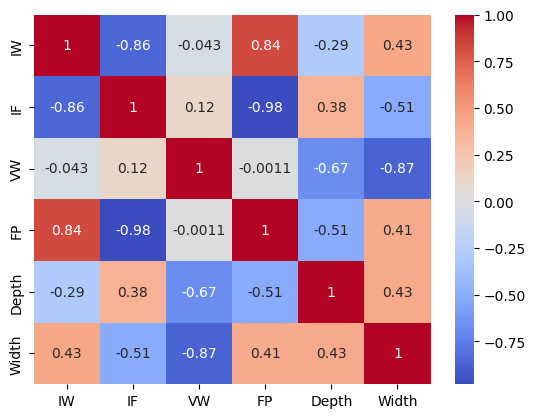

In [ ]:
# Корреляция
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

Проверка данных на пропуски, задвоения.

In [ ]:
# Проверка на пропуски
print(df.isnull().sum())

IW       0
IF       0
VW       0
FP       0
Depth    0
Width    0
dtype: int64


Нормализация числовых признаков.


In [ ]:
# Нормализация
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['IW', 'IF', 'VW', 'FP']])

 Предобработка данных

In [ ]:
# Предобработка данных
X = df[['IW', 'IF', 'VW', 'FP']]
y_depth = df['Depth']
y_width = df['Width']

Разделение на обучающую и тестовую выборки

In [ ]:
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_depth_train, y_depth_test = train_test_split(X, y_depth, test_size=0.2, random_state=42)
X_train, X_test, y_width_train, y_width_test = train_test_split(X, y_width, test_size=0.2, random_state=42)

In [17]:
#Стандартизация
scaler_X = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y_depth = MinMaxScaler()
y_train_depth_scaled = scaler_y_depth.fit_transform(y_train_depth.values.reshape(-1, 1)).flatten()
y_test_depth_scaled = scaler_y_depth.transform(y_test_depth.values.reshape(-1, 1)).flatten()

scaler_y_width = MinMaxScaler()
y_train_width_scaled = scaler_y_width.fit_transform(y_train_width.values.reshape(-1, 1)).flatten()
y_test_width_scaled = scaler_y_width.transform(y_test_width.values.reshape(-1, 1)).flatten()

NameError: name 'X_train' is not defined

# Модели машинного обучения

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train_depth, y_test_depth = train_test_split(X, y_depth, test_size=0.2, random_state=42)
_, _, y_train_width, y_test_width = train_test_split(X, y_width, test_size=0.2, random_state=42)

# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Обучаем и применяем масштабирование к тренировочным данным
X_test_scaled = scaler.transform(X_test)  # Применяем масштабирование к тестовым данным

# Модель ElasticNet для глубины
elastic_net_depth = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)

# Модель Bagging Regressor
bagging_regressor = BaggingRegressor(n_estimators=10, random_state=42)


Bagging Regressor (Depth) - MAE: 0.073, RMSE: 0.094, R²: 0.848
Bagging Regressor (Width) - MAE: 0.033, RMSE: 0.043, R²: 0.981
ElasticNet (Depth) - MAE: 0.127, RMSE: 0.181, R²: 0.434
ElasticNet (Width) - MAE: 0.086, RMSE: 0.110, R²: 0.879


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'roo

In [ ]:

# Обучение моделей на глубине
elastic_net_depth.fit(X_train_scaled, y_train_depth)  # Обучаем модель ElasticNet на глубине
bagging_regressor.fit(X_train_scaled, y_train_depth)  # Обучаем модель Bagging Regressor на глубине

# Прогнозирование с использованием Bagging Regressor на глубине
y_pred_bagging_depth = bagging_regressor.predict(X_test_scaled)  # Предсказываем глубину для тестовой выборки

# Прогнозирование с использованием ElasticNet на глубине
y_pred_elastic_depth = elastic_net_depth.predict(X_test_scaled)  # Предсказываем значения глубины для тестовой выборки

# Оценка моделей для глубины
mae_bagging_depth = mean_absolute_error(y_test_depth, y_pred_bagging_depth)  # Средняя абсолютная ошибка для Bagging Regressor по глубине
rmse_bagging_depth = mean_squared_error(y_test_depth, y_pred_bagging_depth, squared=False)  # RMSE для Bagging Regressor по глубине
r2_bagging_depth = r2_score(y_test_depth, y_pred_bagging_depth)  # Коэффициент детерминации R² для Bagging Regressor по глубине

mae_elastic_depth = mean_absolute_error(y_test_depth, y_pred_elastic_depth)  # Средняя абсолютная ошибка для ElasticNet по глубине
rmse_elastic_depth = mean_squared_error(y_test_depth, y_pred_elastic_depth, squared=False)  # RMSE для ElasticNet по глубине
r2_elastic_depth = r2_score(y_test_depth, y_pred_elastic_depth)  # Коэффициент детерминации R² для ElasticNet по глубине


In [ ]:

# Обучение Bagging Regressor на ширине и прогнозирование
bagging_regressor.fit(X_train_scaled, y_train_width)  # Обучаем модель Bagging Regressor на ширине
y_pred_bagging_width = bagging_regressor.predict(X_test_scaled)  # Предсказываем ширину для тестовой выборки

# Модель ElasticNet для ширины
elastic_net_width = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)

# Обучение ElasticNet на ширине
elastic_net_width.fit(X_train_scaled, y_train_width)  # Обучаем модель ElasticNet на ширине
y_pred_elastic_width = elastic_net_width.predict(X_test_scaled)  # Предсказываем значения ширины для тестовой выборки

# Оценка моделей для ширины
mae_bagging_width = mean_absolute_error(y_test_width, y_pred_bagging_width)  # Средняя абсолютная ошибка для Bagging Regressor по ширине
rmse_bagging_width = mean_squared_error(y_test_width, y_pred_bagging_width, squared=False)  # RMSE для Bagging Regressor по ширине
r2_bagging_width = r2_score(y_test_width, y_pred_bagging_width)  # Коэффициент детерминации R² для Bagging Regressor по ширине

mae_elastic_width = mean_absolute_error(y_test_width, y_pred_elastic_width)  # Средняя абсолютная ошибка для ElasticNet по ширине
rmse_elastic_width = mean_squared_error(y_test_width, y_pred_elastic_width, squared=False)  # RMSE для ElasticNet по ширине
r2_elastic_width = r2_score(y_test_width, y_pred_elastic_width)  # Коэффициент детерминации R² для ElasticNet по ширине


In [ ]:

# Выводим результаты для Bagging Regressor
print(f"Bagging Regressor (Depth) - MAE: {mae_bagging_depth:.3f}, RMSE: {rmse_bagging_depth:.3f}, R²: {r2_bagging_depth:.3f}")
print(f"Bagging Regressor (Width) - MAE: {mae_bagging_width:.3f}, RMSE: {rmse_bagging_width:.3f}, R²: {r2_bagging_width:.3f}")

# Выводим результаты для ElasticNet
print(f"ElasticNet (Depth) - MAE: {mae_elastic_depth:.3f}, RMSE: {rmse_elastic_depth:.3f}, R²: {r2_elastic_depth:.3f}")
print(f"ElasticNet (Width) - MAE: {mae_elastic_width:.3f}, RMSE: {rmse_elastic_width:.3f}, R²: {r2_elastic_width:.3f}")


Результаты моделей Bagging Regressor (глубина) и ElasticNet:
MAE (средняя абсолютная ошибка): 0,073;
RMSE (корень из среднеквадратичной ошибки): 0,094;
R² (коэффициент детерминации): 0,848 (Bagging Regressor, глубина);
MAE: 0,033;
RMSE: 0,043;
R²: 0,981 (Bagging Regressor, ширина);
MAE: 0,127;
RMSE: 0,181;
R²: 0,434 (ElasticNet, глубина);
MAE: 0,086;
RMSE: 0,110;
R²: 0,879 (ElasticNet, ширина).
Анализ результатов Bagging Regressor:
Глубина: модель показывает хорошие результаты с MAE = 0,073 и R² = 0,848, что указывает на хорошее объяснение вариации данных;
Ширина: значительно лучше, чем глубина. MAE = 0,033 и R² = 0,981 указывают на точное предсказание ширины, объясняя почти всю вариацию данных. Это говорит о том, что зависимости, определяющие ширину, могут быть более явными или менее шумными по сравнению с глубиной.
ElasticNet:
Глубина: значительно хуже, чем Bagging Regressor, с MAE = 0,127 и R² = 0,434. Это указывает на плохое соответствие модели данным и может свидетельствовать о том, что ElasticNet не смог захватить сложные зависимости в данных глубины;
Ширина: хотя ElasticNet показывает лучшие результаты по сравнению с глубиной (MAE = 0,086, R² = 0,879), он всё же уступает Bagging Regressor по ширине. Это также может указывать на то, что более простые модели могут лучше справляться с этой задачей.
Выводы Bagging Regressor:
Кажется, что модель Bagging Regressor превосходит ElasticNet как для глубины, так и для ширины. Это может быть связано с тем, что ансамблевые методы, такие как Bagging, лучше справляются с нестабильностью и шумом в данных.